# Introduction

This notebook's intution is to solve the problem of predicting metro traffic based on features in the Indian Metro dataset from Kaggle repository. Firstly, before applying any machine learning algorithms, the dataset must be preprocessed to improve computation and then visualized to draw preliminary insights about the impact of features on dataset. Next,this notebook provides explnation the for two important linear regression algorithms - namesly, Least Squares and Least Mean Sqaures which are implemented using object-oritented concepts in python and its numpy library, providing some examples how to use the newly implemented algorithms, visualizing the output and a metric to evaluate the model. Thereafter, the algorithms are applied to dataset in the experiment section whose results are published in conclusion. And the most significant and least sigificant faeures of dataset are deduced and their impact on dataset is studied by applying algorithms.


# Data

The dataset chosen for regression problem is Indian Metro Dataset from Kaggle Repository.This dataset has information about the traffic volume observed during 2012- 2017 recorded on different timestamps a day,with information if the day being one of the  holidays, the weather conditions like temperature, wind speed, wind direction, different weather types, rainfall ph and snow ph which can all be major determinants of traffic volume. This dataset has 33750 entries with 14 attributes and 1 target varibale. The problem  to this visualizing this dataset is the main attribute timestamp is a string which should be converted to datetime object in order to variations with respect to year, month, day and hour. The attributes of dataset are visulaized with respect to target target volume to detect any patterns and draw preliminary observation. 

## Reading the Dataset- Data Description 

Using read_csv function from pandas library to read the dataset into a Dataframe. Then using info function to know the dataset which states there are 33750 input samples and 15 features. This dataset has four object featues weather_type which is string and has 11 different types of weather, another object feature is weather_description which is also a string with briefly describing weather type. date_time and is_holiday are other object types which are also string type. date_time is string formatted date time of when instance is recored and is_holiday is set of different holidays. The target variable is 'traffic_volume' which is an integer and the other attributes of data are weathear measurements like - wind_speed, wind_direction, rain ph, snow ph, the visibility in miles, dew, temperature, clouds, humidity and air pollution index recoreded as either float or integer which can have significant impact on traffic volume. using describe function to check the statistical aspects of int and float features. These values can give breif idea on scales of features. And checked for missing values or invalid values using isnull and isna functions from pandas library and any function from Numpy library to check, which resulted False in both the cases. And finally using head and tail functions to see first and last five instances of dataset respectively.


In [273]:
# Importing libraries pandas , matplotlib and seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [274]:
# Reading data

df_traffic = pd.read_csv('./IN_Metro_Traffic.csv')


# Preview of first five instances
df_traffic.head(5)

,date_time,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,clouds_all,weather_type,weather_description,traffic_volume
0,2012-10-02 09:00:00,None,121,89,2,329,1,1,288.28,0.0,0.0,40,Clouds,scattered clouds,5545
1,2012-10-02 10:00:00,None,178,67,3,330,1,1,289.36,0.0,0.0,75,Clouds,broken clouds,4516
2,2012-10-02 11:00:00,None,113,66,3,329,2,2,289.58,0.0,0.0,90,Clouds,overcast clouds,4767
3,2012-10-02 12:00:00,None,20,66,3,329,5,5,290.13,0.0,0.0,90,Clouds,overcast clouds,5026
4,2012-10-02 13:00:00,None,281,65,3,329,7,7,291.14,0.0,0.0,75,Clouds,broken clouds,4918


In [275]:
# Understaning the features and their data types
print(df_traffic.info())

# learning the information about features
print(df_traffic.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33750 entries, 0 to 33749
Data columns (total 15 columns):
date_time              33750 non-null object
is_holiday             33750 non-null object
air_pollution_index    33750 non-null int64
humidity               33750 non-null int64
wind_speed             33750 non-null int64
wind_direction         33750 non-null int64
visibility_in_miles    33750 non-null int64
dew_point              33750 non-null int64
temperature            33750 non-null float64
rain_p_h               33750 non-null float64
snow_p_h               33750 non-null float64
clouds_all             33750 non-null int64
weather_type           33750 non-null object
weather_description    33750 non-null object
traffic_volume         33750 non-null int64
dtypes: float64(3), int64(8), object(4)
memory usage: 3.9+ MB
None
       air_pollution_index      humidity    wind_speed  wind_direction  \
count         33750.000000  33750.000000  33750.000000    33750.000000   
mean  

In [276]:
# checking for invalid values in dataset
print(np.any(df_traffic.isna()))

# checking for null/missing values in dataset
print(np.any(df_traffic.isnull()))

False
False


## Preprocessing of the data

Categorial feature 'is_Holiday' is converted to boolean 1 if its a holiday and 0 it is not a holiday. And then encoded the enother categorical feature 'weather_type' by manually marking different type a value based on the severity in a dictionary and swapping the keys with values in the dataframe column. Next transforming the 'date_time' which is of string type to datetime object to extract information which can used to observe trends with year, month, day, hour, day of the week and also extracting information if it is a weekend. The days of weekday are encoded as integers with Monday as 1 and Sunday as 7. And the weekend feature is 1 if day of week is either Saturday(6) or Sunday(7) and 0 for other days. The other categorial feature this dataset has is 'weather_description', on investing the values of the feature, they breifly describe weather type in a single sentence and is of case sensitive, converting the text to lower so to categorize better. But since the weather_type provides enough information for visualization. This feature can be redundant. So next is dropping the redundant features from dataset - 'weather_description' and 'date_time', which is also now redundant as all information it can provide is mapped to new columns 'year', 'month', 'day','hour','weekday'and 'is_weekend'. 


In [277]:
df_traffic.is_holiday.value_counts()

None                         33707
New Years Day                    5
Thanksgiving Day                 5
Christmas Day                    5
Washingtons Birthday             4
Veterans Day                     4
Columbus Day                     4
Labor Day                        4
State Fair                       3
Memorial Day                     3
Independence Day                 3
Martin Luther King Jr Day        3
Name: is_holiday, dtype: int64

In [278]:
def isHolidayBool(x):
    if x== 'None':
        return 0
    else:
        return 1
    
df_traffic.is_holiday= df_traffic.is_holiday.apply(lambda x : isHolidayBool(x))
df_traffic.is_holiday.value_counts()

0    33707
1       43
Name: is_holiday, dtype: int64

In [279]:
df_traffic.weather_type.value_counts()

Clouds          11213
Clear            9233
Mist             4047
Rain             3940
Snow             2070
Drizzle          1204
Haze              902
Fog               567
Thunderstorm      553
Smoke              17
Squall              4
Name: weather_type, dtype: int64

In [280]:
# manually encoding the labels to assign the weather scale 

weather_type_dic = {'Clouds':1, 'Clear':0, 'Mist':2, 'Rain':5, 'Snow':10, 'Drizzle':6, 'Haze':3,
                    'Fog':4, 'Thunderstorm':9, 'Smoke':7, 'Squall':8}

df_traffic.weather_type = df_traffic.weather_type.apply(lambda x : weather_type_dic[x])

df_traffic.weather_type.value_counts()

1     11213
0      9233
2      4047
5      3940
10     2070
6      1204
3       902
4       567
9       553
7        17
8         4
Name: weather_type, dtype: int64

In [281]:
from datetime import datetime
print(df_traffic.date_time[4])
print(type(df_traffic.date_time[4]))
datetime.strptime(df_traffic.date_time[4], '%Y-%m-%d %H:%M:%S')

2012-10-02 13:00:00
<class 'str'>


datetime.datetime(2012, 10, 2, 13, 0)

In [282]:
datetime.strptime(df_traffic.date_time[4], '%Y-%m-%d %H:%M:%S').isoweekday()

2

In [283]:
def isWeekend(day):
    if day in [6,7]:
        return 1
    else:
        return 0

In [284]:
df_traffic["date_time"] = df_traffic["date_time"].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
df_traffic["year"] = df_traffic["date_time"].apply(lambda x: x.year)
df_traffic["month"] = df_traffic["date_time"].apply(lambda x: x.month)
df_traffic["day"] = df_traffic["date_time"].apply(lambda x: x.day)
df_traffic["hour"] = df_traffic["date_time"].apply(lambda x: x.hour)
df_traffic["weekday"] = df_traffic["date_time"].apply(lambda x: x.isoweekday())
df_traffic["is_weekend"] = df_traffic["weekday"].apply(lambda x: isWeekend(x))

In [285]:
# Removing Redundant features - date and text description
df_traffic = df_traffic.drop(['date_time','weather_description'],axis = 1)

## Visualization of the data

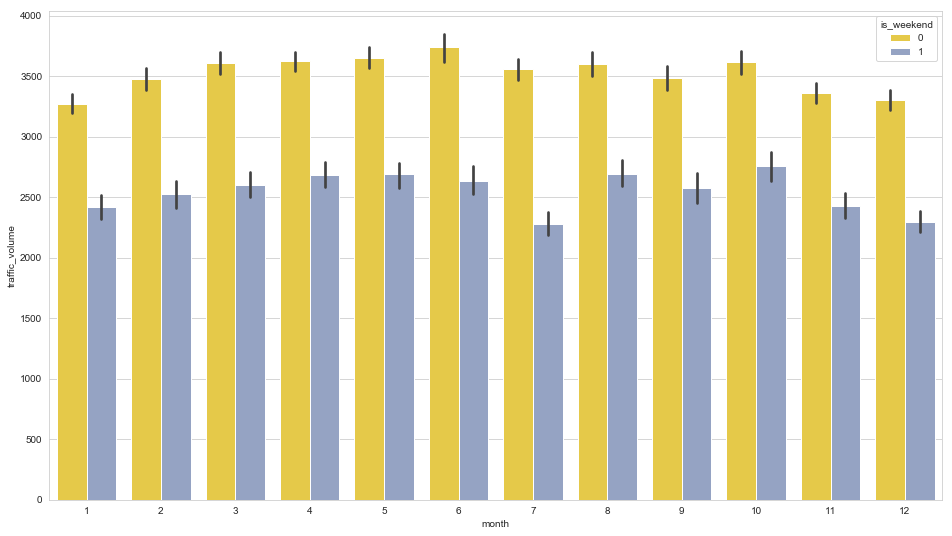

In [286]:
sns.set_style('whitegrid')
plt.figure(figsize = (16,9))
sns.barplot(data=df_traffic, x= 'month', y='traffic_volume',palette='Set2_r', hue="is_weekend")

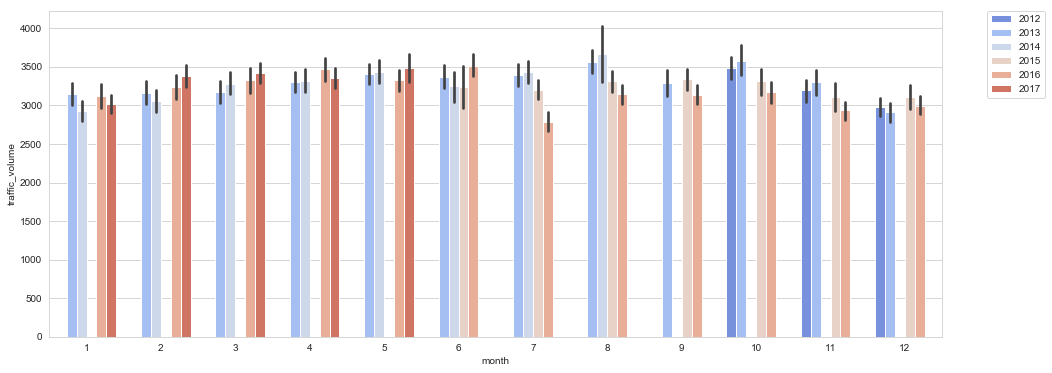

In [287]:
plt.figure(figsize = (16,6))
sns.barplot(data=df_traffic, x= 'month', y='traffic_volume', hue='year', palette='coolwarm')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

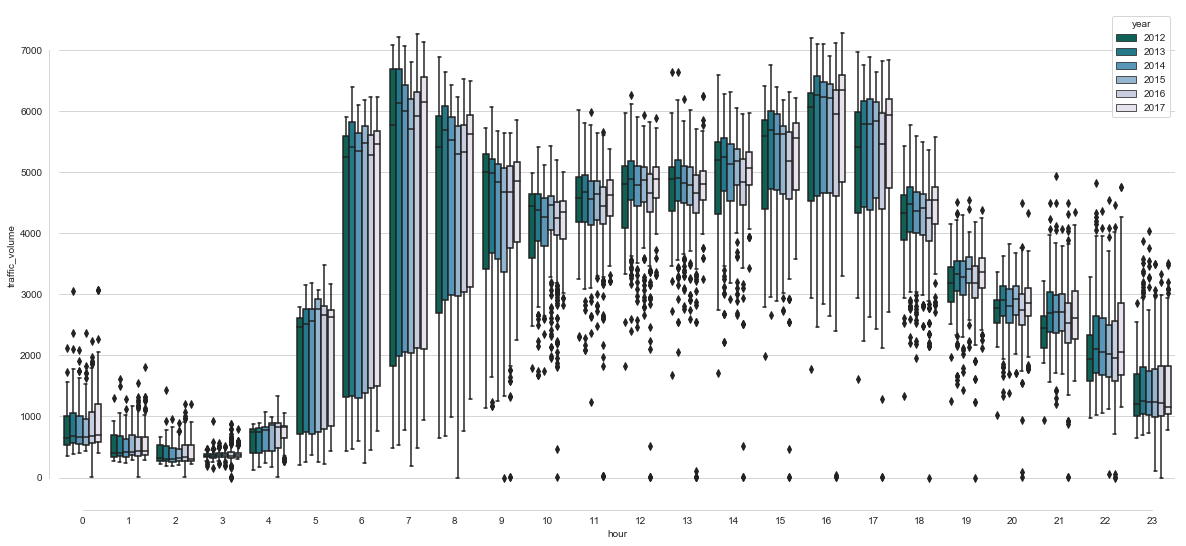

In [288]:
plt.figure(figsize = (20,9))
#sns.violinplot(data=df_traffic, palette='PuBuGn_r', inner="hour")
sns.boxplot(x="hour", y="traffic_volume",hue="year", palette="PuBuGn_r",data=df_traffic)
sns.despine(offset=10, trim=True)

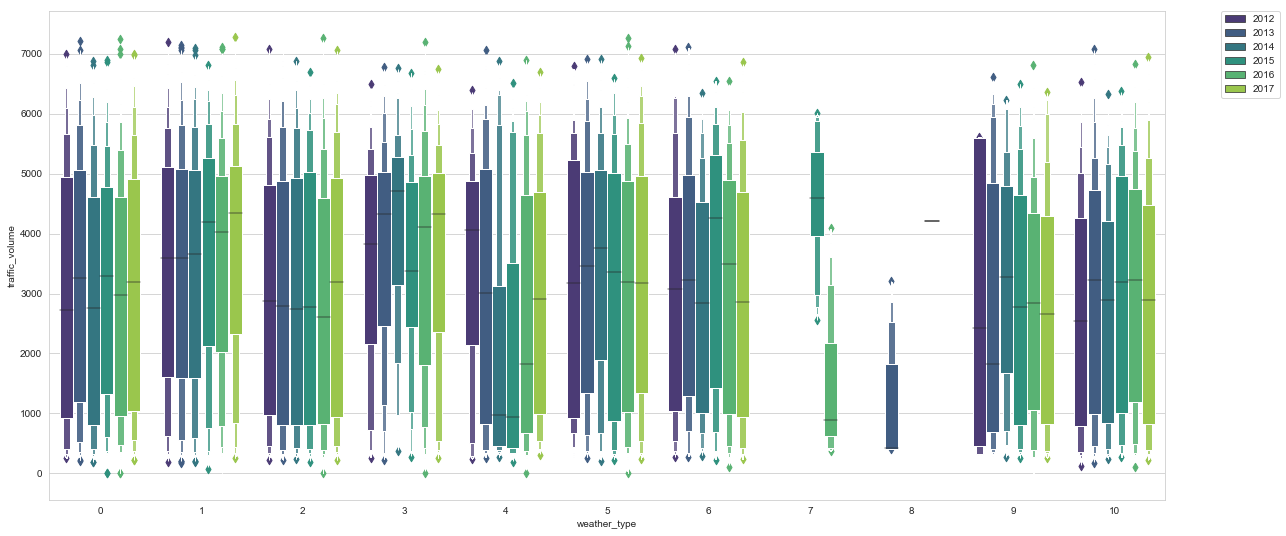

In [289]:
plt.figure(figsize = (20,9))
sns.boxenplot(x="weather_type", y="traffic_volume", data=df_traffic, palette="viridis", hue='year')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

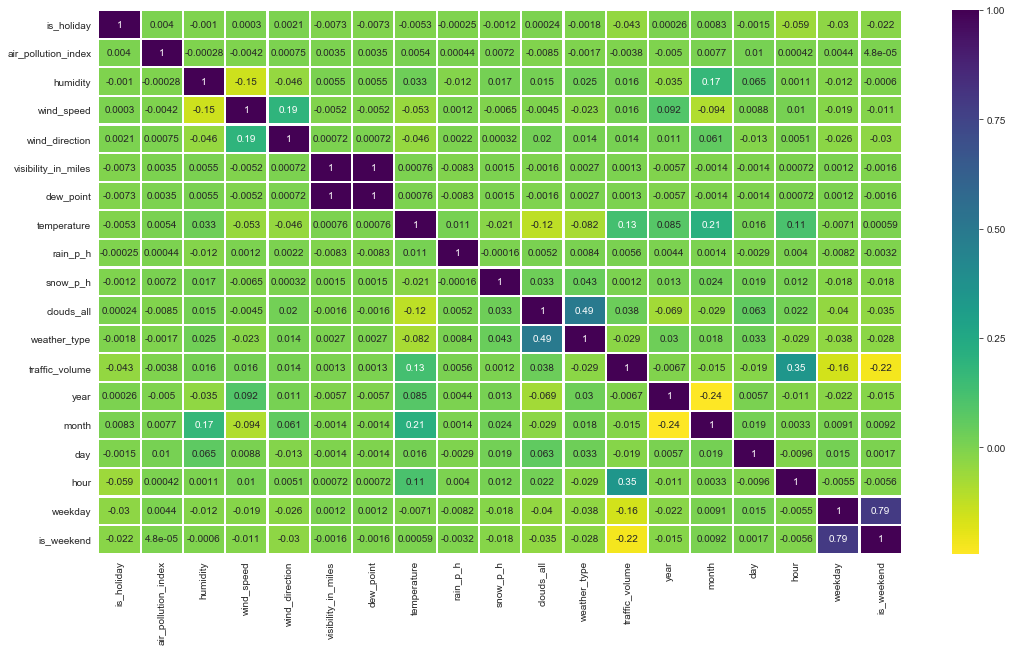

In [290]:
df_traffic_corr = df_traffic.corr(method='pearson')
plt.figure(figsize = (18,10))
sns.heatmap(df_traffic_corr, cbar=True,cmap="viridis_r", linewidths=1.2,annot=True)


## Preliminary observation

The dataset has data for six years from 2012-2017, but some few years, data for couple of months is only available.For every month, data of atmost five years is only available, which might hamper the accuracy of predictions made for future. So, month and year cannot be major predictors here, as they are incomplete. Generally, the traffic is less in first and last two months of the year as per barplot where tarffic is plotted against month and weekend. Also, the same plot conveys a sudden dip is observed in July on weekends, which can be due to lowest traffic volume recorded in July 2016 compared to months of all years as illustrated in the plot right below it. And from the boxplot of traffic volume against hour viewed yearly which seems very informative and has a pattern for all years, there is most of traffic is from 6 AM to 9 AM and then later at 3 PM to 5PM, which are most of the office commute timings. This plot is aslo Shockingly throughout all the years, traffic volume is almost same when weather is clear and snowing. Strangely there is much less traffic volume when weather is squall but this illustration could be due to insufficient samples. Also, from joint plot, more the humidity more is the traffic volume. And from facetgrid plotted to display patterns among features 'is_holiday', 'month', 'year', 'traffic_volume', the holiday traffic was shifted from last months of the year to first from 2012 to 2017, the years in between (2012,2017) exclusive both limits had better holiday traffic comparatively.And from correlation heatmap, the target variable traffic flow is highly correlated to hour of the day and temperature. The attributes humidity wind_speed have same correlation with respect to traffic_volume. And the pairwise correlation between dew_point and visibility_in_miles very high 1.


## Futher Preprocessing 

Transforming year using hot encoding, mentioned above there is imbalanced data available for yaers. Dataset is randomized and split for training and testing as 80:20 ratio. The numerical features which are 'air_pollution_index', 'humidity', 'wind_speed', 'wind_direction','clouds_all','temperature', 'visibility_in_miles', 'dew_point', 'rain_p_h', 'snow_p_h' and target variable 'traffic_volume' are feature scaled using MinMax Normalization which is defined as
$$
            input val= \frac{input value - min val}{(max val- min val)} 
$$
And the preview of the newly transformed dataset is viewed with head function.

In [291]:
#df_traffic = df.copy(deep=True)

In [292]:
df_traffic.columns

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type', 'traffic_volume',
       'year', 'month', 'day', 'hour', 'weekday', 'is_weekend'],
      dtype='object')

In [293]:
df = df_traffic.copy(deep=True)

## Using one hot endoing for year variable as it is imbalanced

def transform_categoricalFeatures(df, feat):
    df = pd.concat([df, pd.get_dummies(df[feat], feat)], axis=1)
    return df

df_traffic = transform_categoricalFeatures(df_traffic,'year')
df_traffic.drop('year', axis=1, inplace=True)

In [298]:
## Randomizing the dataset row-wise

# def Randomizing(df):    
#     df = df.reindex(np.random.permutation(df.index))
#     return df

# df_traffic = Randomizing(df_traffic)
# df_traffic.head()

from sklearn.utils import shuffle

num = np.random.randint(0, 3000)
df_traffic_train = df_traffic.sample(frac=0.8,random_state=num) #random state is a seed value
df_traffic_test = df_traffic.drop(train.index)

In [331]:
df_traffic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27000 entries, 12935 to 5799
Data columns (total 24 columns):
is_holiday             27000 non-null int64
air_pollution_index    27000 non-null float64
humidity               27000 non-null float64
wind_speed             27000 non-null float64
wind_direction         27000 non-null float64
visibility_in_miles    27000 non-null float64
dew_point              27000 non-null float64
temperature            27000 non-null float64
rain_p_h               27000 non-null float64
snow_p_h               27000 non-null float64
clouds_all             27000 non-null float64
weather_type           27000 non-null int64
traffic_volume         27000 non-null float64
month                  27000 non-null int64
day                    27000 non-null int64
hour                   27000 non-null int64
weekday                27000 non-null int64
is_weekend             27000 non-null int64
year_2012              27000 non-null uint8
year_2013              27000 n

In [300]:
air_pollution_index_min = df_traffic_train['air_pollution_index'].min()
air_pollution_index_max = df_traffic_train['air_pollution_index'].max()

humidity_min = df_traffic_train['humidity'].min()
humidity_max = df_traffic_train['humidity'].max()

wind_speed_min = df_traffic_train['wind_speed'].min()
wind_speed_max = df_traffic_train['wind_speed'].max()

wind_direction_min = df_traffic_train['wind_direction'].min()
wind_direction_max = df_traffic_train['wind_direction'].max()

clouds_all_min = df_traffic_train['clouds_all'].min()
clouds_all_max = df_traffic_train['clouds_all'].max()

temperature_min = df_traffic_train['temperature'].min()
temperature_max = df_traffic_train['temperature'].max()

visibility_in_miles_min = df_traffic_train['visibility_in_miles'].min()
visibility_in_miles_max = df_traffic_train['visibility_in_miles'].max()

dew_point_min = df_traffic_train['dew_point'].min()
dew_point_max = df_traffic_train['dew_point'].max()

rain_p_h_min = df_traffic_train['rain_p_h'].min()
rain_p_h_max = df_traffic_train['rain_p_h'].max()

snow_p_h_min = df_traffic_train['snow_p_h'].min()
snow_p_h_max = df_traffic_train['snow_p_h'].max()

traffic_volume_min = df_traffic_train['traffic_volume'].min()
traffic_volume_max = df_traffic_train['traffic_volume'].max()

In [301]:
def MinMaxNormalization(df, col, col_min, col_max):
    df[col] = df[col].apply(lambda x: (x-col_min)/(col_max-col_min))
    return df 

In [302]:
df_traffic_train = MinMaxNormalization(df_traffic_train, 'air_pollution_index', air_pollution_index_min, air_pollution_index_max)
df_traffic_train = MinMaxNormalization(df_traffic_train, 'humidity', humidity_min, humidity_max)
df_traffic_train = MinMaxNormalization(df_traffic_train, 'wind_speed', wind_speed_min, wind_speed_max)
df_traffic_train = MinMaxNormalization(df_traffic_train, 'wind_direction', wind_direction_min, wind_direction_max)
df_traffic_train = MinMaxNormalization(df_traffic_train, 'clouds_all',clouds_all_min, clouds_all_max)
df_traffic_train = MinMaxNormalization(df_traffic_train, 'temperature', temperature_min, temperature_max) 
df_traffic_train = MinMaxNormalization(df_traffic_train, 'visibility_in_miles', visibility_in_miles_min, visibility_in_miles_max)                           
df_traffic_train = MinMaxNormalization(df_traffic_train, 'dew_point', dew_point_min, dew_point_max)                        
df_traffic_train = MinMaxNormalization(df_traffic_train, 'rain_p_h', rain_p_h_min, rain_p_h_max) 
df_traffic_train = MinMaxNormalization(df_traffic_train, 'snow_p_h', snow_p_h_min, snow_p_h_max) 
df_traffic_train = MinMaxNormalization(df_traffic_train, 'traffic_volume', traffic_volume_min, traffic_volume_max) 

In [303]:
df_traffic_test = MinMaxNormalization(df_traffic_test, 'air_pollution_index', air_pollution_index_min, air_pollution_index_max)
df_traffic_test = MinMaxNormalization(df_traffic_test, 'humidity', humidity_min, humidity_max)
df_traffic_test = MinMaxNormalization(df_traffic_test, 'wind_speed', wind_speed_min, wind_speed_max)
df_traffic_test = MinMaxNormalization(df_traffic_test, 'wind_direction', wind_direction_min, wind_direction_max)
df_traffic_test = MinMaxNormalization(df_traffic_test, 'clouds_all',clouds_all_min, clouds_all_max)
df_traffic_test = MinMaxNormalization(df_traffic_test, 'temperature', temperature_min, temperature_max) 
df_traffic_test = MinMaxNormalization(df_traffic_test, 'visibility_in_miles', visibility_in_miles_min, visibility_in_miles_max)                           
df_traffic_test = MinMaxNormalization(df_traffic_test, 'dew_point', dew_point_min, dew_point_max)                        
df_traffic_test = MinMaxNormalization(df_traffic_test, 'rain_p_h', rain_p_h_min, rain_p_h_max) 
df_traffic_test = MinMaxNormalization(df_traffic_test, 'snow_p_h', snow_p_h_min, snow_p_h_max) 
df_traffic_test = MinMaxNormalization(df_traffic_test, 'traffic_volume', traffic_volume_min, traffic_volume_max) 

# Method

Summarize the linear models (least-squares and LMS) and explain your implementation of **class** *LinearModel*. 
The explanation of your codes should not be the comments in a code cell. 
This section should include
 - review of the linear models 
 - your implementation and description


## Summarize the linear models (least-squares and Least Mean Sqaure Algorithms)

In supervised learning problems where target label is predicted from input estimators, the simplest way is that the target variable is sum of all products of estimators/features and some scalar. These scalar values are based on how much the target changes when its corresponding estimator/feature is varied. This simplest model is *linear model*. The scalar coefficients are refered as weights, which reprsent impact of feature variation on target. And based on how these weights are computed, we have two algorithms. First one being *Least Squares*, where weights are computed such that squared error from actual and predicted target variable is minimum. 

$$
E(w) = \sum_{i=1}^N \Big( f(x_i; w_i) - t_i \Big)^2
$$

$$
            = (X w - t)^T (X w - t) 
$$

$$
            = w^T X^T X w - 2 t^T X w + t^T t 
$$

To minimize this function, the derivative of this should be eqauted to zero. 

$$
\frac{\partial E(w)}{\partial w} = 0
$$

And solving the equationn with linear algebra, which finally results in 

$$
w = \big(X^\top X\big)^{-1} X^\top t
$$



And in scenarios when weights cannot be computed on all instances at once or in cases of large datsets to compute using all instance its computationlly costly and time taking , then *Least Mean Sqaures(LMS)* algorithm can be used. In this algorithm the weights, w is updated on every instance by subracting the error for that instance and this is repeated for instances. This is referred as online learning. 

$$
w^{(k+1)} = w^{(k)} - \alpha \nabla E_k 
$$

where $E_k$ is the error for the $k$'th instance and $\alpha$ is a learning rate. 
This is called *stochastic gradient descent* or *sequential gradient descent*. And the error $\nabla E_k$ is squares error of predicted actual value and actual target value

$$
\nabla E_k = \frac{\partial E}{\partial w^{(k)}} 
           = \frac{\partial }{\partial w^{(k)}}\Big( f(x_k; w^{(k)}) - t_k \Big)^2
$$

$$
            = 2\Big( {w^{(k)}}^\top x_k - t_k \Big) x_k.
$$


And this modifies the weights of every instance to
$$
w^{(k+1)} = w^{(k)} - \alpha \Big( {w^{(k)}}^\top x_k - t_k \Big) x_k
$$


## Implementation of Algorithms

To implement the algorithms, the object oriented approach is used. First an abstract class is created which has abstract methods. So if these class is ever inherited to create other classes, then these abstarct methods must be implemented for sure. This is our BaseModel. Next, the a class is implemented by inheriting the BaseModel which is LinearModel which initializes the weights of linear model,has the abstract methods of its super class and two more methods, one to add the ones column and another to check if the variable is a matrix or not. Least Squares algorithm is implemented by inherting the LinearModel and implementing the abstract methods train and use. In train, the weights matrix w is computed which is used to make predictions. And then the predictions are computed with use method.The Least Mean Squares algorithm is implemented by inheriting the LinearModel class and adding the code to train, train_step and use methods. Train_step is the method to update weight for each instance and all the weights are updated for all instances using train by looping for each input instance. In each update, the weights are wights are upadted using the eqation mentioned above. 


### Super Classs Definition

In [304]:
import numpy as np 
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    
class LinearModel(BaseModel):
    """
        Abstract class for a linear model 
        
        Attributes
        ==========
        w       ndarray
                weight vector/matrix
    """

    def __init__(self):
        """
            weight vector w is initialized as None
        """
        self.w = None

    
    # check if the matrix is 2-dimensional. if not, raise an exception    
    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    ####################################################
    #### abstract funcitons ############################
    @abstractmethod
    def train(self, X, T):
        """
            train linear model
            
            parameters
            -----------
            X     2d array
                  input data
            T     2d array
                  target labels
        """        
        pass
    
    @abstractmethod
    def use(self, X):
        """
            apply the learned model to input X
            
            parameters
            ----------
            X     2d array
                  input data
            
        """        
        pass 

### Least Squares

In [305]:
# Linear Regression Class for least squares
class LinearRegress(LinearModel): 
    """ 
        LinearRegress class 
        
        attributes
        ===========
        w    nd.array  (column vector/matrix)
             weights
    """
    def __init__(self):
        LinearModel.__init__(self)
        
    # train lease-squares model
    def train(self, X, T):
        X1 = self.add_ones(X)
        self.w = np.linalg.inv(X1.T @ X1) @ X1.T @ T
        
    
    # apply the learned model to data X
    def use(self, X):
        X1 = self.add_ones(X)
        y = X1 @ self.w
        return y

### Least Mean Squares

In [306]:
import collections # for checking iterable instance

# LMS class 
class LMS(LinearModel):
    def __init__(self, alpha):
        LinearModel.__init__(self)
        self.alpha = alpha
        
    
    # batch training by using train_step function
    def train(self, X, T):
        N = X.shape[0]
        
        for k in range(N):
            #print(X[k,:], T[k])
            self.train_step(X[k,:], T[k])
            #print(self.w.T)
        
            
    # train LMS model one step 
    # here the x is 1d vector
    def train_step(self, x, t):
        x = x.reshape(1,-1)
        x = self.add_ones(x)
        if self.w is None:
            self.w = np.zeros((x.shape[1], 1))
        err = (x@self.w - t)
        self.w -= self.alpha*(err)*x.T
        
    
    # apply the current model to data X
    def use(self, X):
        X = self.add_ones(X)
        Y = X@self.w
        return Y
        

### Usage Examples

In [307]:
# HERE follow are for my code tests.

import matplotlib.pyplot as plt
%matplotlib inline

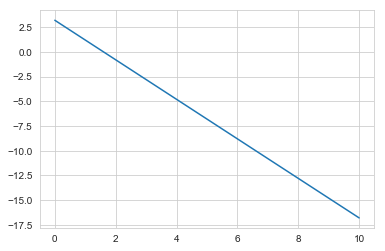

In [308]:
X = np.linspace(0,10, 11).reshape((-1, 1))
T = -2 * X + 3.2

ls = LinearRegress()
ls.train(X, T)
plt.plot(ls.use(X))

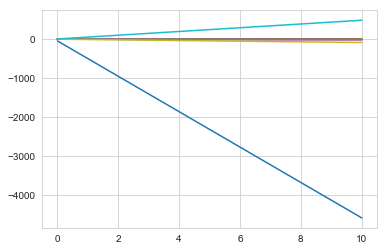

In [309]:
lms = LMS(0.1)
for x, t in zip(X, T):
    lms.train_step(x, t)
    plt.plot(lms.use(X))

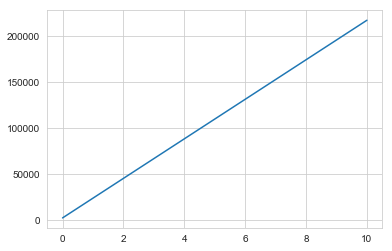

In [310]:
lms.train(X, T)
plt.plot(lms.use(X))

# Experiments

Apply LS and LMS methods on the data and discuss the results.


The experiment here is to predict the traffic_volume using Least Sqaure and Least Mean Square Algorithms implented above. The RMSE function below computes the error and is used as metric to evaulate the models. As the dataset is already split into 80:20 after shuffling above in the further processing section. Below the X_train, X_test, Y_train and Y_test are defined. Since these are dataframes, they are converted to matrices and output column vector is shaped to a column matrix. And instance of class is created and these matrices are passed to functions train and use as inputs. And RMSE is calulated and output is visulized with respect to input on plots. Also, the time taken to tarin is measured as well.

In [311]:
## Function to evaluate roor mean sqaured error

def RMSE(Y_test, Y_predict):
    return np.sqrt((np.sum((Y_test-Y_predict)**2))/len(Y_test))

In [312]:
## defining X_train, X_test, Y_train and Y_test 


Y_train = df_traffic_train['traffic_volume']
Y_test = df_traffic_test['traffic_volume']
X_train = df_traffic_train.drop('traffic_volume', 1)
X_test = df_traffic_test.drop('traffic_volume', 1) 

In [313]:
X_train.columns

Index(['is_holiday', 'air_pollution_index', 'humidity', 'wind_speed',
       'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature',
       'rain_p_h', 'snow_p_h', 'clouds_all', 'weather_type', 'month', 'day',
       'hour', 'weekday', 'is_weekend', 'year_2012', 'year_2013', 'year_2014',
       'year_2015', 'year_2016', 'year_2017'],
      dtype='object')

In [314]:
## ## converting X_train, X_test, Y_train and Y_test to matrices

X_train_mat = X_train.as_matrix()
X_test_mat = X_test.as_matrix()
Y_train_mat = Y_train.as_matrix()
Y_test_mat = Y_test.as_matrix()

In [315]:
print(Y_train_mat.shape)
print(Y_test_mat.shape)

(27000,)
(6750,)


In [316]:
## reshaping to convert a vecor to matrix

Y_train_mat = Y_train_mat.reshape(-1,1)
print(Y_train_mat.shape)
Y_test_mat = Y_test_mat.reshape(-1,1)
print(Y_test_mat.shape)

(27000, 1)
(6750, 1)


In [317]:
import time

Time taken to train 0.015089299999999639
RMSE
2.201069833090221


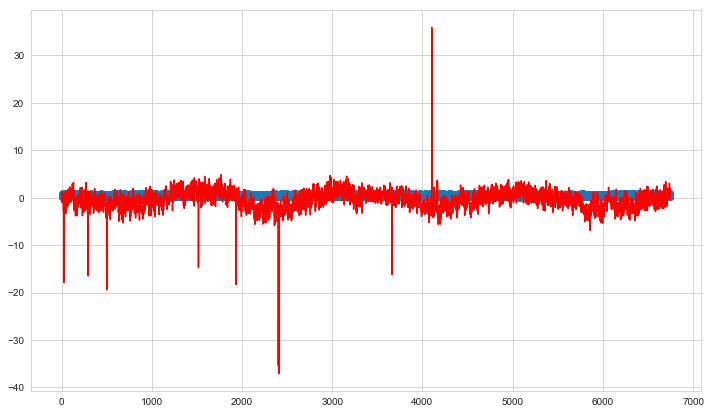

In [338]:
plt.figure(figsize=(12, 7))

start_time = time.perf_counter()
model_LS = LinearRegress()
model_LS.train(X_train_mat, Y_train_mat)
end_time = time.perf_counter()

Y_predict_0 = model_LS.use(X_test_mat)

time_elasped = end_time - start_time

print("Time taken to train "+ str(time_elasped))

plt.scatter(np.arange(len(X_test_mat)),Y_test_mat.T )
plt.plot(Y_predict_0, 'r')
print("RMSE")
print(RMSE(Y_test_mat, Y_predict_0))

### LMS 

Time taken to train 1.006696400000692
RMSE
0.2807823156084752


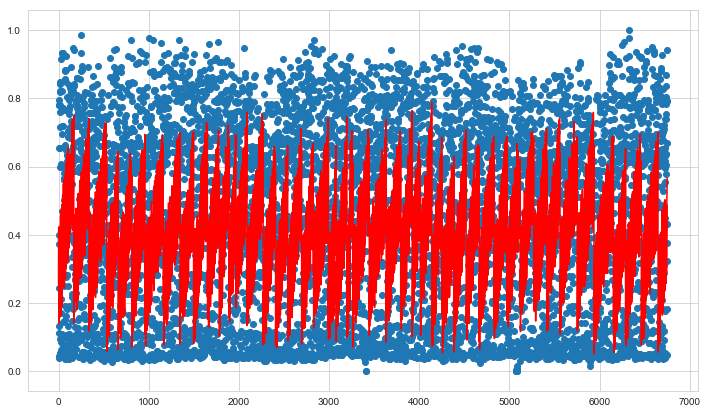

In [339]:
plt.figure(figsize=(12, 7))

start_time = time.perf_counter()
lms = LMS(0.0000003)
lms.train(X_train_mat, Y_train_mat)
end_time = time.perf_counter()
Y_lms_predict_0 = lms.use(X_test_mat)

time_elasped = end_time - start_time

print("Time taken to train "+ str(time_elasped))

plt.scatter(np.arange(len(X_test_mat)),Y_test_mat.T )
plt.plot(Y_lms_predict_0, 'r')
print("RMSE")
print(RMSE(Y_test_mat, Y_lms_predict_0))

## Analysis

Least Squares Algorithm takes more computational costly than that of Least Mean Square Algorithm for large datasets, but the experiments above states, the time taken to train Least Squares model is 0.015 sec and time taken to  train Least Mean Squares Algorithm is 1 sec as the training samples are 27000 which are not that many. Also, before spliting into train and test the dataset is shuffled randomly, if it is not done. The train set for Least squares cannot compute weight as the input will be a singular matrix whose inverse does not exist. This is one of the drawbacks of Least Squares Algorithm but no such thing Least Mean Square Algorithm since no inverse needs to to be calculated. And the problem with Least Mean Square is the parameter alpha, learning rate, if alpha is decreased by 10 fold, the resultant weights are nan's, because at some point error will become very large and keeps on increasing untill end becoming inf.

And if the dataset is properly shuffled before train-test split, and model is trained with LMS the RMSE is much more accurate, as weights are upadated incrementally and after many iterations, there tends be the best fit. But to simply a test a regression on dataset the LS algorithm works best as the impact on features is more pronounced and it can be helpful in feature selection.



To know what is the feature of least significance and most significance, one of the methods is correlation. The sqaure of correlation with respect to target traffic_volume is considered as determininat to check the importance of a particular feature. The following code shaows the visual interpretation of features and sqaure of correlation. And the ranking table is computed in the next cell, according to which hour is the feature of most impotance and snow_p_h is the feature of least importance.   

Least Significant - snow_p_h
Having this feature to predict target only increases computation, we can ignore this feature and there wont be much impact on predictions. Sometimes, removing least signifiacnt features even results in decrease in error as they were only increasing computaion nothing more.

Most Significant - hour
By removing this this feature, there will be huge impact on error, as small change in this feature corresponds to change in output and if it is dropped then the predictions for sure wont be accurate thus increasing error. 


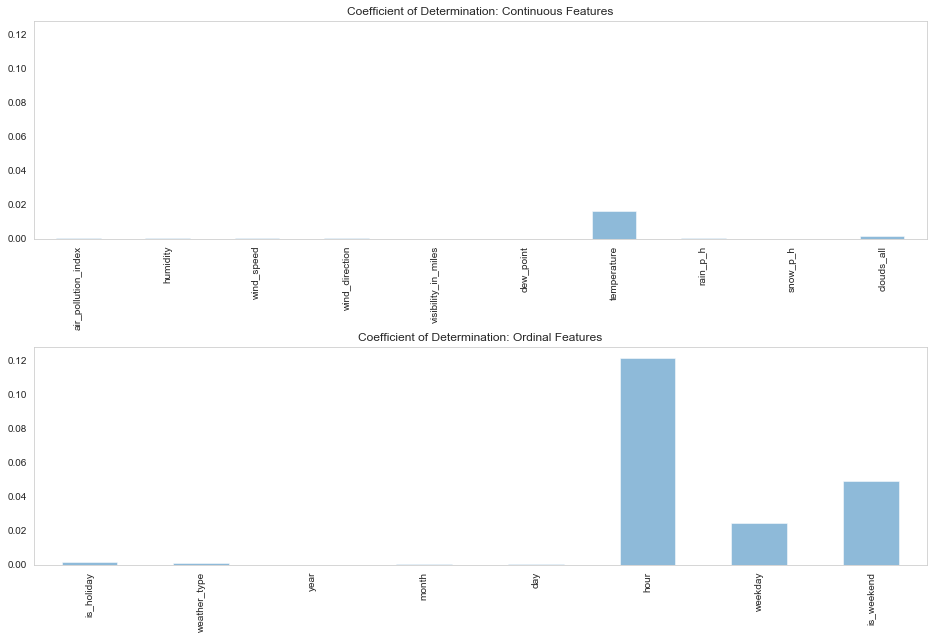

In [320]:
continous_feat = ['air_pollution_index', 'humidity', 'wind_speed', 'wind_direction', 'visibility_in_miles', 'dew_point', 'temperature', 'rain_p_h', 'snow_p_h', 'clouds_all']
ordinal_feat = ['is_holiday','weather_type', 'year', 'month', 'day', 'hour', 'weekday', 'is_weekend']
target = 'traffic_volume'


f, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharey=True)
plt.subplots_adjust(hspace=0.5)

# continuous features
df[continous_feat].corrwith(df[target]).agg('square').plot.bar(ax=ax1, alpha=0.5)
ax1.set_title('Coefficient of Determination: Continuous Features')
ax1.grid()

# ordinal features
df[ordinal_feat].corrwith(df[target]).agg('square').plot.bar(ax=ax2, alpha=0.5)
ax2.set_title('Coefficient of Determination: Ordinal Features')
ax2.grid()

In [321]:
results = pd.DataFrame(df.drop(target, axis=1).corrwith(df[target]).agg('square'), 
                       columns=['det_weight'])

ranks = np.zeros(len(results), dtype=np.int)
for i, j in enumerate(np.argsort(results.det_weight)[::-1]):
    ranks[j] = i
results['det_rank'] = ranks

results.sort_values('det_rank').loc[:, ['det_rank', 'det_weight']]


,det_rank,det_weight
hour,0,0.121708
is_weekend,1,0.049252
weekday,2,0.024722
temperature,3,0.016351
is_holiday,4,0.001856
clouds_all,5,0.001438
weather_type,6,0.000818
day,7,0.000358
humidity,8,0.000271
wind_speed,9,0.000267


In [322]:
df_traffic_train.describe()

,is_holiday,air_pollution_index,humidity,wind_speed,wind_direction,visibility_in_miles,dew_point,temperature,rain_p_h,snow_p_h,...,day,hour,weekday,is_weekend,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017
count,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000
mean,0.001333,0.502137,0.669963,0.211032,0.554296,0.501412,0.501412,0.908583,0.000053,0.000537,...,15.659074,11.360148,3.993926,0.285778,0.074667,0.255259,0.142889,0.128259,0.277000,0.121926
std,0.036491,0.289752,0.194070,0.128966,0.277435,0.321725,0.321725,0.044122,0.006087,0.017409,...,8.708886,6.934103,2.008344,0.451792,0.262858,0.436015,0.349966,0.334384,0.447525,0.327206
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.252595,0.540230,0.125000,0.361111,0.250000,0.250000,0.881707,0.000000,0.000000,...,8.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.505190,0.678161,0.187500,0.555556,0.500000,0.500000,0.908870,0.000000,0.000000,...,16.000000,11.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.754325,0.827586,0.312500,0.805556,0.750000,0.750000,0.942642,0.000000,0.000000,...,23.000000,17.000000,6.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,31.000000,23.000000,7.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


###  Below is the experiment to see impact when snow_p_h not considered to predict target

In [323]:
X_train1 = X_train.drop('snow_p_h', axis=1)
X_test1 = X_test.drop('snow_p_h', axis=1)

In [324]:
X_train1_mat = X_train1.as_matrix()
X_test1_mat = X_test1.as_matrix()

RMSE
1.391834382622573


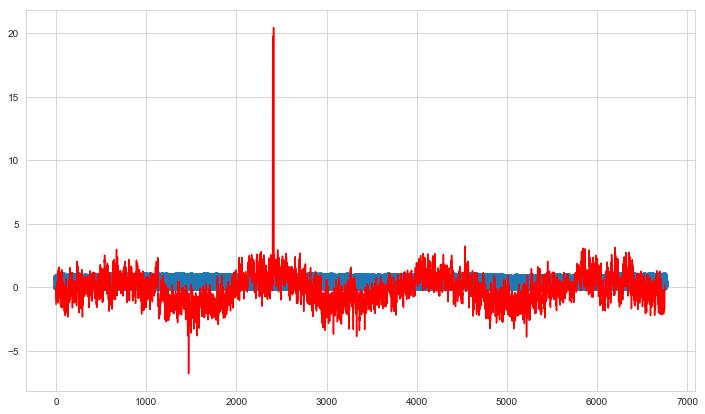

In [325]:
plt.figure(figsize=(12, 7))
model_LS1 = LinearRegress()
model_LS1.train(X_train1_mat, Y_train_mat)
Y_predict_1 = model_LS1.use(X_test1_mat)
plt.scatter(np.arange(len(X_test1_mat)),Y_test_mat.T )
plt.plot(Y_predict_1, 'r')
print("RMSE")
print(RMSE(Y_test_mat, Y_predict_1))

RMSE
0.28078231564866957


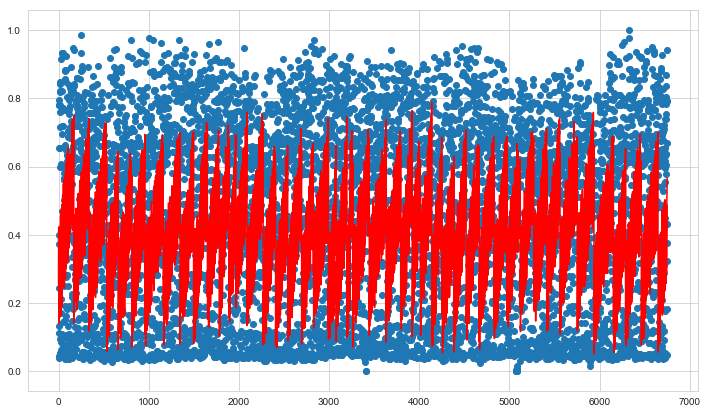

In [326]:
plt.figure(figsize=(12, 7))
lms1 = LMS(0.0000003)
lms1.train(X_train1_mat, Y_train_mat)
Y_lms_predict_1 = lms1.use(X_test1_mat)
plt.scatter(np.arange(len(X_test1_mat)),Y_test_mat.T )
plt.plot(Y_lms_predict_1, 'r')
print("RMSE")
print(RMSE(Y_test_mat, Y_lms_predict_1))

###  Below is the experiment to see impact when hour not considered to predict target

In [327]:
X_train2 = X_train.drop('hour', axis=1)
X_test2 = X_test.drop('hour', axis=1)
X_train2_mat = X_train2.as_matrix()
X_test2_mat = X_test2.as_matrix()

RMSE
71.46522604114014


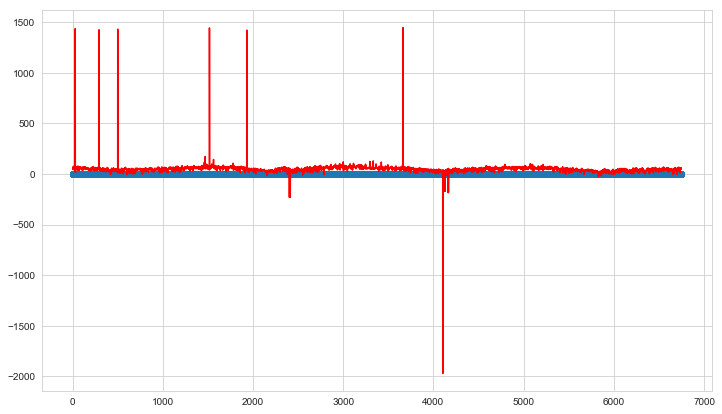

In [328]:
plt.figure(figsize=(12, 7))
model_LS2 = LinearRegress()
model_LS2.train(X_train2_mat, Y_train_mat)
Y_predict_2 = model_LS2.use(X_test2_mat)
plt.scatter( np.arange(len(X_test2_mat))  , Y_test_mat)
plt.plot(Y_predict_2, 'r')
print("RMSE")
print(RMSE(Y_test_mat, Y_predict_2))

RMSE
0.3279617050684328


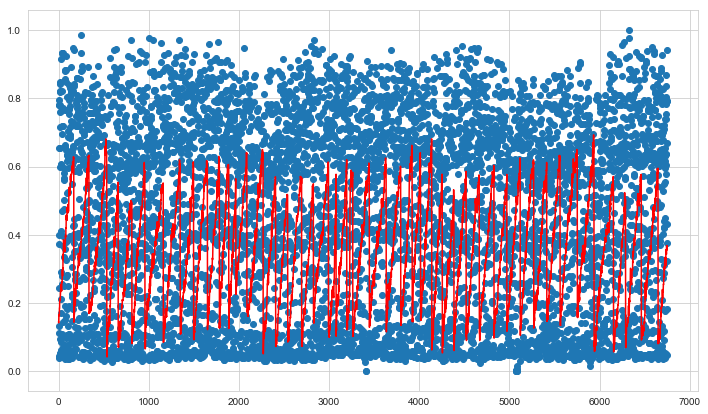

In [329]:
plt.figure(figsize=(12, 7))
lms2 = LMS(0.0000003)
lms2.train(X_train2_mat, Y_train_mat)
Y_predict_lms_2 = lms2.use(X_test2_mat)
plt.scatter( np.arange(len(X_test2_mat))  , Y_test_mat)
plt.plot(Y_predict_lms_2, 'r')
print("RMSE")
print(RMSE(Y_test_mat, Y_predict_lms_2))

### Analysis


Experimental RMSE 


|   Algorithm\ Condition    |   Original   | without snow_p_h | without hour |
|---------------------------|--------------|------------------|--------------|
| Least Squares             |   2.2010698  |   1.3918343      |  71.465226   |
| Least Mean Sqaures        |   0.2807823  |   0.2807823      |  0.3279617   |

When most significant feature 'hour' is dropped there is a huge impact in predicting outputs which is displayed by increase RMSE values, for Least Squares algorithm the RMSE change is from 2 to 71 and Least Mean Square Algorithm the RMSE change is from 0.280 to 0.327. When least significant feature 'snow_p_h' is dropped to check how prediction changes, it is observed that the RMSE either decreases or remains constant which is matches the experimental results in the table above, RMSE for Least Squares algorithm has improved(reduced) and constant in case of Least Mean Sqaures Algorithm. This change is actually expected in LS as there would be one less weight.  

# Preliminary Test
To check your codes to pass all three tests as in sample outputs. 

In [330]:
# Self-Test code for accuracy of your model 
# Primilnary test data
X = np.array([[2,5],
              [6,2],
              [1,9],
              [4,5],
              [6,3],
              [7,4],
              [8,3]])
T = X[:,0, None] * 3 - 2 * X[:, 1, None] + 3
N = X.shape[0]

def rmse(T, Y):
    return np.sqrt(np.sum((T-Y)**2))

model_names = ['LS', 'LMS_All', 'LMS_1STEP']
models = [LinearRegress(), LMS(0.02), LMS(0.02)]
#train
for i, model in enumerate(models):
    print("training ", model_names[i], "...") 
    if i == len(models) -1: 
        # train only one step for LMS2
        model.train_step(X[0], T[0])
    else:
        model.train(X, T)

def check(a, b, eps=np.finfo(float).eps):
    if abs(a-b) > eps:
        print("failed.", a, b)
    else:
        print("passed.")

errors = [1.19e-13, 2.8753214702, 38.0584918251]
for i, model in enumerate(models):
    print("---- Testing ", model_names[i], "...", end=" ") 
    
    # rmse test
    err = rmse(T, model.use(X))
    if check(err, errors[i], eps=1e-10):
        print ("check your weights: ", model.w)
        print ("oracle: ", )


training  LS ...
training  LMS_All ...
training  LMS_1STEP ...
---- Testing  LS ... passed.
---- Testing  LMS_All ... passed.
---- Testing  LMS_1STEP ... passed.


# Conclusions

Regression models using Least Square and Least Mean Algorithms are implemented with root mean squared errors (RMSE) 2.2010 and 0.2807 respectively. The major challenges in developing the linear regression models with low error are many. First one being, what to do with object datatypes like datetime, weather, weather description. I dropped the weather description as its had text whose information is already being conveyed with weather_type feature. And converted the string type of datetime to datetime object and extracted the useful information - day, month, year, hour and then dropped the original datetime column. And what kind of encoding to use for categorical features. I implemented one hot encoding for year while label encoding for weather_type. And extracting formation from given features, like the holidays feature to boolean by just checking if its a holiday rather which holiday which was a text feature and adding a feature if day is week day or weekend. Another challenge would be what feature should be normalized and using which technique. I implemented minmax normalization and normalized all continous features including target. Lastly, a major challenge was to pick the right alpha for least maen square algorithm, which by trail and error method I found I value used above. 

It was an my first ML model without using any scikit learn or any built in library for ml.

## References

Sakar, C.O., Polat, S.O., Katircioglu, M. et al. Neural Comput & Applic (2018).

Ian Goodfellow , Yoshua Bengio , Aaron Courville, Deep Learning, MIT Press (2016).

Dataset Source 
Kaggle  https://www.kaggle.com/umairnsr87/indian-metro-data


Web References :

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

https://seaborn.pydata.org/examples/scatterplot_sizes.html

http://learntech.uwe.ac.uk/da/Default.aspx?pageid=1442

https://www.kaggle.com/mommermi/identifying-important-features
